# **Esercitazione 4 - Classificatori: KNN e Decision Trees**

In questa esercitazione applicheremo quanto appreso sui classificatori. Nello specifico utilizzeremo:

* **K-Nearest Neighbors (KNN):** Un algoritmo di classificazione basato sulla similarità che assegna una classe a un'osservazione in base alle classi dei suoi "K" vicini più prossimi.

* **Decision Trees:** Un modello di classificazione che utilizza una struttura ad albero per prendere decisioni basate su regole derivate dalle caratteristiche dei dati.

### **Dataset Breast Cancer**

Il dataset di riferimento sarà `breast_cancer`, un noto dataset di classificazione che contiene informazioni su tumori al seno. Le osservazioni includono diverse caratteristiche misurate sui tumori, come dimensioni, forma e altre metriche, con l'obiettivo di classificare i tumori in due categorie: **benigni** e **maligni**.

Per questa esercitazione, utilizzeremo l'intero dataset, mantenendo le classi originali. Il dataset è composto da 569 campioni e 30 caratteristiche, e utilizzeremo questo set per costruire i modelli di classificazione.

Il codice seguente esegue l'importazione delle librerie necessarie, il caricamento del dataset `breast_cancer` e la preparazione dei dati. In particolare, gestiremo i dati e le etichette in modo da facilitare l'uso dei classificatori K-Nearest Neighbors (KNN) e Decision Trees.

Dal caricamente del dataset estrarremo anche i nomi delle feature e della variabile target perchè ci servirà più avanti.

In [4]:
# Importazione delle librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [9]:
# Caricamento del dataset Iris
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

# Estraggo nomi delle feature e dei target
feature_names = dataset.feature_names
target_names = dataset.target_names

### **Divisione e standardizzazione del dataset** 

Dividiamo il dataset in `train set`, `validation set` e `test set` utilizzando le proporzioni già impostate. Successivamente applichiamo la standardizzazione utilizzando `StandardScaler`.

In [10]:
# Usare le seguenti proporzioni per il train, validation e test
train_fraction = 0.6  
validation_fraction = 0.2  
test_fraction = 0.2

# svolgimento...
num_train = int(X.shape[0] * train_fraction)
num_val = int(X.shape[0] * validation_fraction)
X_train = X[: num_train]
y_train = y[: num_train]
X_val = X[num_train : num_train + num_val]
y_val = y[num_train : num_train + num_val]
X_test = X[num_train + num_val :]
y_test = y[num_train + num_val :]
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(341, 30)
(113, 30)
(115, 30)


## **Esercizio 1: Implementare K-NN**

Per implementare il classificatore K-Nearest Neighbors utilizzeremo la classe `sklearn.neighbors.KNeighborsClassifier` presente in `scikit-learn`. La documentazione è disponibile [a questo link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Di seguito vediamo i parametri chiave che bisogna specificare al momento della creazione dell'istanza:

* **`n_neighbors`**: Numero di vicini da considerare. Valori più elevati implicano una maggiore generalizzazione.
* **`weights`**: Specifica come pesare i vicini; può essere `uniform` (tutti i vicini hanno lo stesso peso) o `distance` (i vicini più prossimi hanno un peso maggiore).
* **`metric`**: Tipo di distanza da utilizzare per calcolare la distanza tra i punti (ad esempio, `euclidean`, `manhattan`, ecc.).

### Esempio di sintassi per istanziare, addestrare e predire

```python
# Importo KNeighborsClassifier da scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# 1. Instanzio il modello KNN
# Durante la creazione dell'istanza imposto i parametri che desidero
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# 2. Train del modello utilizzando il metodo .fit()
model.fit(X_train, y_train)

# 3. Calcolo delle predizioni utilizzando il metodo .predict()
predictions = model.predict(X_test)

```

### **Guida per la risoluzione del K-Nearest Neighbors (KNN)**

Di seguito sono spiegati i passaggi principali per la risoluzione dell'esercizio utilizzando il classificatore K-Nearest Neighbors.

1. **Creazione del modello:** Creare un'istanza della classe `KNeighborsClassifier`, specificando i parametri presentati poco sopra. In particolare vogliamo i seguenti parametri:

    - `n_neighbors` = 5

    - `weights` = `'uniform'` (o `'distance'` se vuoi dare un peso maggiore ai vicini più prossimi)

    - `metric` = `'euclidean'` (puoi cambiare con `'manhattan'` se preferisci un'altra metrica di distanza)

2. **Addestramento del modello:** Addestriamo il modello utilizzando il metodo `.fit()`. Il modello deve essere addestrato sui dati di training. Assicurati che i dati siano adeguatamente preprocessati e, se necessario, normalizzati o standardizzati.

3. **Calcolo delle predizioni:** Calcoliamo le predizioni sul validation e sul test set utilizzando il metodo `.predict()` del modello.

4. **Valutazione delle prestazioni del modello:** Calcoliamo l'accuracy del modello. Possono essere utilizzate anche altre metriche, come la precisione, il richiamo e il punteggio F1, per ottenere una valutazione più completa. Dobbiamo valutare il modello sia sul validation set che sul test set e infine stampare il valore di accuracy su entrambi i set.

5. **Calcolare la matrice di confusione:** Calcolare la matrice di confusione.

In [11]:
# Step 1: Creazione del modello KNN

# svolgimento...
from sklearn.neighbors import KNeighborsClassifier

modello = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

In [12]:
# Step 2: Addestramento del modello KNN

# svolgimento...

modello.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [13]:
# Step 3: Calcolo delle predizioni

# svolgimento...
pred_val = modello.predict(X_val)
pred_test = modello.predict(X_test)

In [14]:
# Step 4: Valutazione del modello KNN

# svolgimento...
val_correct = sum(pred_val == y_val)
test_correct = sum(pred_test == y_test)

tot_val = len(y_val)
tot_test = len(y_test)

val_acc = val_correct / tot_val if tot_val > 0 else 0
test_acc = test_correct / tot_test if tot_test > 0 else 0

print(f"validation accuracy: {val_acc:.4f}")
print(f"test accuracy: {test_acc:.4f}")

validation accuracy: 0.9469
test accuracy: 0.9217


#### Funzione alternativa per il calcolo dell' accuracy

Finora abbiamo calcolato manualmente il valore dell' accuracy. Ovvero abbiamo confrontato il vettore delle predizioni con il vettore dei target e successivamente contato quanti campioni combaciano, in modo da avere il numero di predizioni effettuate correttamente. Possiamo effettuare questo calcolo anche utilizzando una funzione di `sklearn`.

La funzione `accuracy_score` infatti ci calcola in automatico il valore dell' accuracy. La sintassi per utilizarla è la seguente

```python
# Importo accuracy_score da scikit-learn
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

```

In [15]:
# Step 4.1: Calcolare l' accuracy con accuracy_score

# svolgimento...
from sklearn.metrics import accuracy_score
val_true = pred_val == y_val
test_true = pred_test == y_test
val_acc_2 = accuracy_score(val_true, pred_val)
test_acc_2 = accuracy_score(test_true, pred_test)

print(f"validation accuracy: {val_acc_2:.4f}")
print(f"test accuracy: {test_acc_2:.4f}")

validation accuracy: 0.7434
test accuracy: 0.7739


In [16]:
# Step 5: Calcolare la matrice di confusione

# svolgimento...
from sklearn.metrics import confusion_matrix
matrice_val = confusion_matrix(y_val, pred_val)
matrice_test = confusion_matrix(y_test, pred_test)
print(matrice_val)
print(matrice_test)

[[26  3]
 [ 3 81]]
[[25  1]
 [ 8 81]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(knn_model, X_train, y_train):

    h = 0.1  
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    unique_classes = np.unique(y_train)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)  
    
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', 
                          label='Training set', cmap=plt.cm.RdYlBu, s=20)  

    plt.title(f'Confini Decisionali di K-Nearest Neighbors')
    plt.legend(scatter.legend_elements()[0], unique_classes, title='Classi')
    plt.show()


### Visualizzazione K-NN

Per visualizzare il margine di classificazione del nostro K-NN dobbiamo utilizzare soltanto 2 features. Poichè nel dataset ne sono presenti 30 abbiamo due soluzioni:

1. **Utilizzare le prime due features del dataset:** soluzione più rapida ma che non ci garantisce un risultato ottimale, in quanto l' ordine delle features non ha alcuna rilevanza circa la loro importanza. **ATTENZIONE:** poichè stiamo utilizzando solo 2 features, dobbiamo riaddestrare il K-NN sul dataset ridotto.

2. **Applicare PCA con 2 componenti:** applichiamo la PCA con due componenti che utilizziamo successivamente per trasformare i nostri dati.

Di seguito applicheremo entrambe le soluzioni e alla fine confronteremo i risultati.

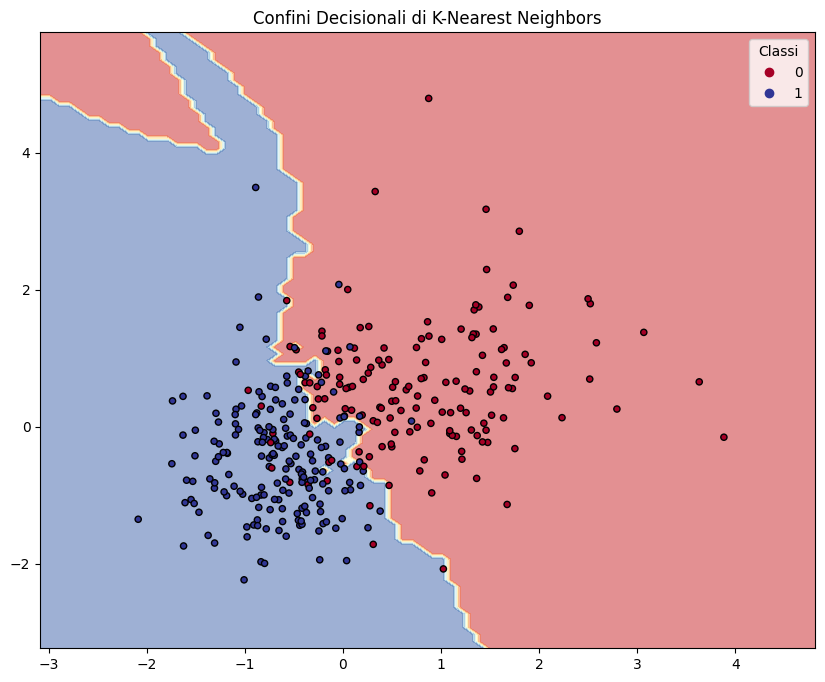

In [18]:
# Visualizzazione con due feature

# Riduciamo il dataset prendendo soltanto le prime 2 features (colonne)

# svolgimento...
X_red = X_train[:,:2]


# Standardizziamo il dataset ridotto

# svolgimento...
scaler = StandardScaler()
X_red = scaler.fit_transform(X_red)

# Creiamo e addestriamo il K-NN sul dataset ridotto e scalato

# svolgimento...
modello.fit(X_red,y_train)


# Utilizziamo la funzione plot_decision_boundary per visualizzare il confine decisionale

# svolgimento...
plot_decision_boundary(modello, X_red, y_train)

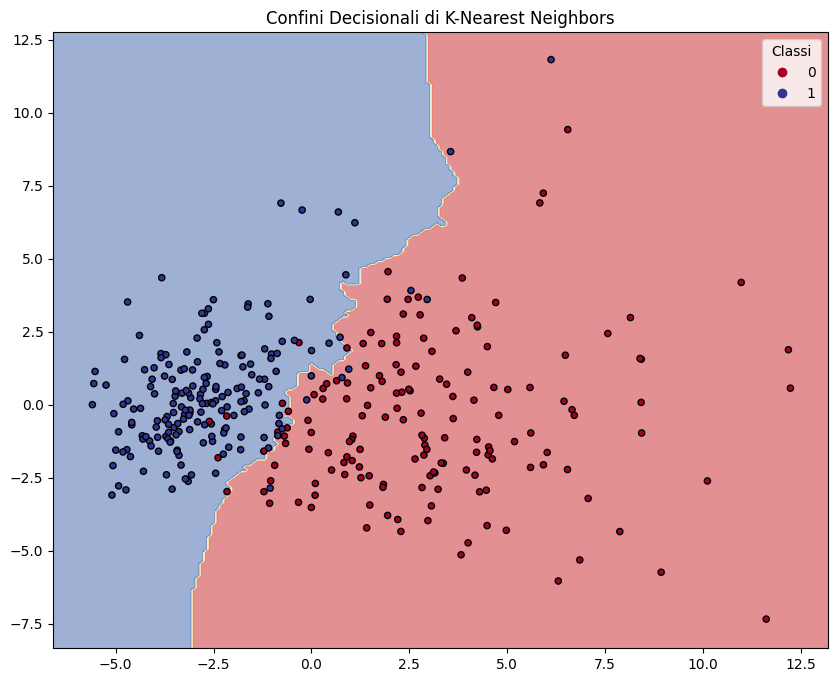

In [19]:
# Visualizzazione con PCA
from sklearn.decomposition import PCA

# Applichiamo PCA per ridurre il dataset a 2 dimensioni. ATTENZIONE: per applicare PCA dobbiamo prima standardizzare.

# svolgimento...
X_train_scaled = scaler.fit_transform(X_train)

# Riduzione delle dimensioni con PCA

# svolgimento...
pca = PCA(2)
X_pca = pca.fit_transform(X_train_scaled)

# Classificatore KNN su dati PCA

# svolgimento...
modello.fit(X_pca, y_train)

# Plot

# svolgimento...
plot_decision_boundary(modello, X_pca,y_train)

In [20]:
# Funzione per la valutazione grafica

def plot_accuracy_k(k_values, train_scores, test_scores):
    plt.figure(figsize=(12, 6))
    
    plt.plot(k_values, train_scores, 'o-', label='Accuratezza Training')
    plt.plot(k_values, test_scores, 'o-', label='Accuratezza Testing')
    
    plt.xlabel('Numero di k')
    plt.ylabel('Accuratezza')
    plt.title('KNN: Accuratezza vs. Valore di k')
    plt.legend()
    plt.grid(True)
    plt.show()

## **Esercizio 2: valutare le prestazioni di K-NN al variare di k e metrica**

Valutiamo come variano le prestazioni del classificatore al variare di:

* **k:** usiamo diversi valori di k.

* **metrica**: usiamo diverse distanze, non solo quella euclidea.


### **Guida:**

1. **Testiamo il classificatore al variare del parametro:** che sia il k o la distanza, dobbiamo istanziare, allenare e valutare il classificatore per ogni valore che ci interessa. Alla fine di ogni test che effettuiamo, saliamo il valore di accuracy ottenuto in una lista.

2. **Valutazione grafica:** utilizziamo la funzione di plot per valutare quale valore del parametro di interesse ci fa ottenere la performance migliore.



(341, 30)
(341,)


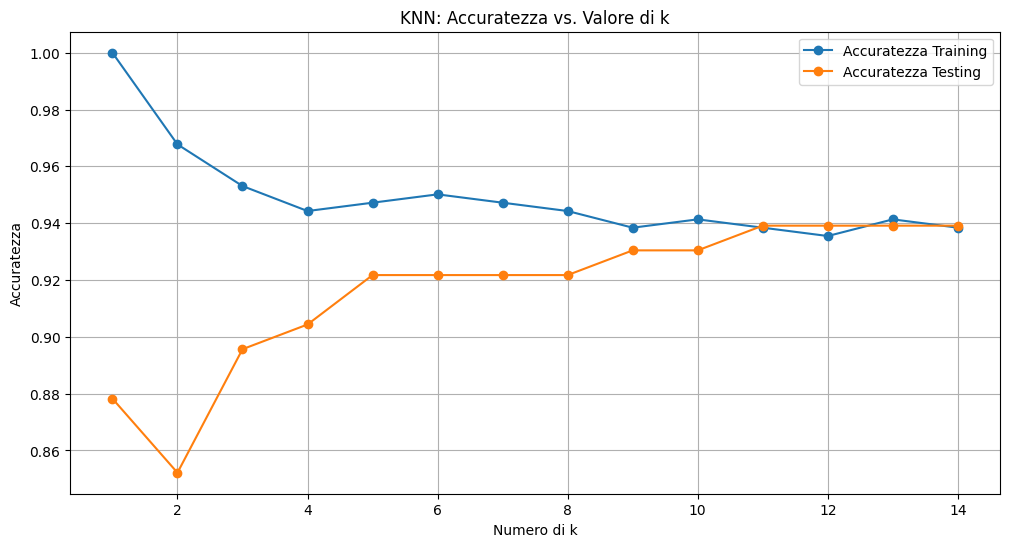

In [21]:
# Valutiamo le performance al variare di k

k_values = range(1, 15) 
train_scores = []
test_scores = []
print(X_train.shape)
print(y_train.shape)
# Istanziamo, alleniamo e valutiamo un K-NN per ogni valore di k 

# svolgimento...
from sklearn.neighbors import KNeighborsClassifier
for k in k_values:
    modello_k_var = KNeighborsClassifier(n_neighbors=k)
    modello_k_var.fit(X_train,y_train)
    train_scores.append(modello_k_var.score(X_train,y_train))
    test_scores.append(modello_k_var.score(X_test,y_test))
# Visualizziamo le performance al variare di k
# N.B. la funzione plot_accuracy_k ha bisogno dei parametri k_values, train_scores, test_scores.

# svolgimento...
plot_accuracy_k(k_values, train_scores, test_scores)

In [22]:
# Funzione per plottare l' accuracy al variare delle metriche

def plot_accuracy_metric(metrics, train_scores, test_scores):
    bar_width = 0.35
    x = np.arange(len(metrics))  

    plt.figure(figsize=(12, 6))

    color_train = plt.cm.RdYlBu(0.9)  
    color_test = plt.cm.RdYlBu(0.4)   

    bars_train = plt.bar(x - bar_width/2, train_scores.values(), width=bar_width, label='Training', color=color_train)
    bars_test = plt.bar(x + bar_width/2, test_scores.values(), width=bar_width, label='Testing', color=color_test)

    plt.xticks(ticks=x, labels=metrics)  
    plt.xlabel('Metriche')
    plt.ylabel('Accuratezza')
    plt.title('KNN: Accuratezza vs. Metriche')
    plt.legend(loc='lower right')
    plt.grid(axis='y')
    
    for bar in bars_train:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    for bar in bars_test:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.show()

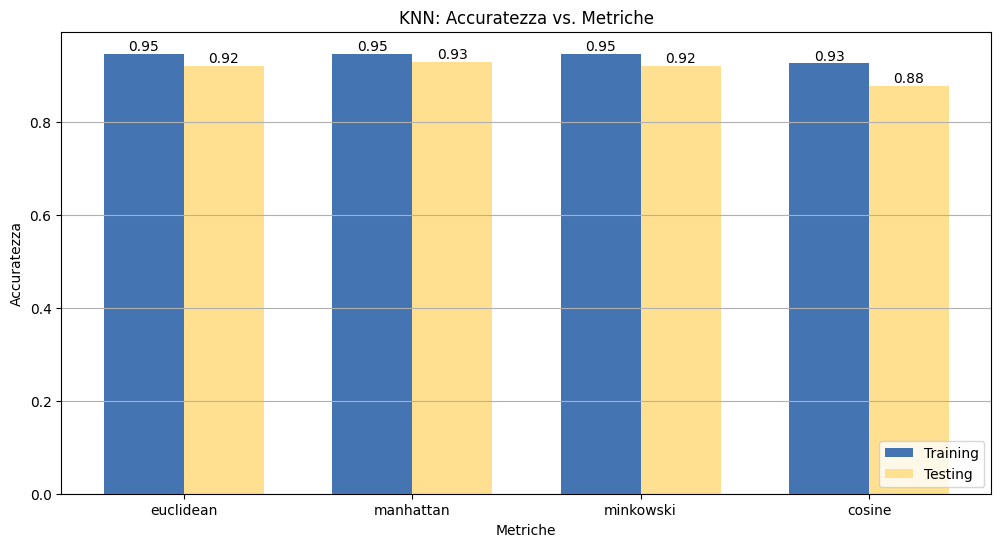

In [23]:
# Valutiamo le performance al variare della metrica
# in questo caso le performance devono essere salvate in un dizionario. Ogni chiave sarà il nome della metrica usata, il valore corrispondente invece sarà l' accuracy ottenuta.

metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
test_scores = {}
train_scores = {}

# Istanziamo, alleniamo e valutiamo un K-NN per ogni metrica. Utilizziamo k=5.

# svolgimento...
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=7, metric = metric)
    knn.fit(X_train, y_train)
    train_scores[metric] = knn.score(X_train, y_train)
    test_scores[metric] = knn.score(X_test, y_test)

# Visualizziamo le performance al variare della metrica
# N.B. la funzione plot_accuracy_metric ha bisogno dei parametri metrics, train_scores, test_scores.

# svolgimento...
plot_accuracy_metric(metrics, train_scores, test_scores)

## **Esercizio 2: Implementare Decision Trees**

Per implementare il classificatore Decision Tree, utilizzeremo la classe `sklearn.tree.DecisionTreeClassifier` presente in `scikit-learn`. La documentazione è disponibile [a questo link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Di seguito vediamo i parametri chiave che bisogna specificare al momento della creazione dell'istanza:

* **`criterion`**: Funzione da utilizzare per misurare la qualità di uno split. 

* **`max_depth`**: Profondità massima dell'albero. Limitare la profondità aiuta a prevenire l'overfitting.

* **`min_samples_split`**: Numero minimo di campioni richiesti per dividere un nodo. Valori più alti rendono l'albero più conservativo.

* **`min_samples_leaf`**: Numero minimo di campioni che devono essere presenti in un nodo foglia. Prevenire nodi foglia con pochi campioni può migliorare la generalizzazione.


### Esempio di sintassi per istanziare, addestrare e predire

```python
# Importo DecisionTreeClassifier da scikit-learn
from sklearn.tree import DecisionTreeClassifier

# 1. Instanzio il modello Decision Tree
# Durante la creazione dell'istanza imposto i parametri che desidero
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

# 2. Train del modello utilizzando il metodo .fit()
model.fit(X_train, y_train)

# 3. Calcolo delle predizioni utilizzando il metodo .predict()
predictions = model.predict(X_test)


## **Esercizio 3: Istanziare allenare e valutare un modello DecisionTree**

In linea con quanto visto finora, istanziamo, alleniamo e valutiamo un modello di DecisionTree. Utilizziamo:

* `criterion`=`'entropy'`

* `random_state` = 42 

Il valore di `random_state` non ha un significato particolare, ma ci permette di rendere l' esperimento deterministico. 

I passaggi per questo esercizio sono uguali a quanto visto in precedenza per K-NN.

In [24]:
# Importiamo DecisionTree 
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [25]:
# Step 1 - Creiamo un albero decisionale

# svolgimento...
decision_tree = DecisionTreeClassifier(criterion ='entropy', random_state = 42)
decision_tree.fit(X_train, y_train)

# Step 2 - Alleniamo il modello

# svolgimento...


# Step 3 - Calcoliamo le predizioni

# svolgimento...
prediction = decision_tree.predict(X_test)

# Step 4 - Valutiamo il modello, calcoliamo accuracy e confusion matrix

# svolgimento...
acc = accuracy_score(y_test, prediction)

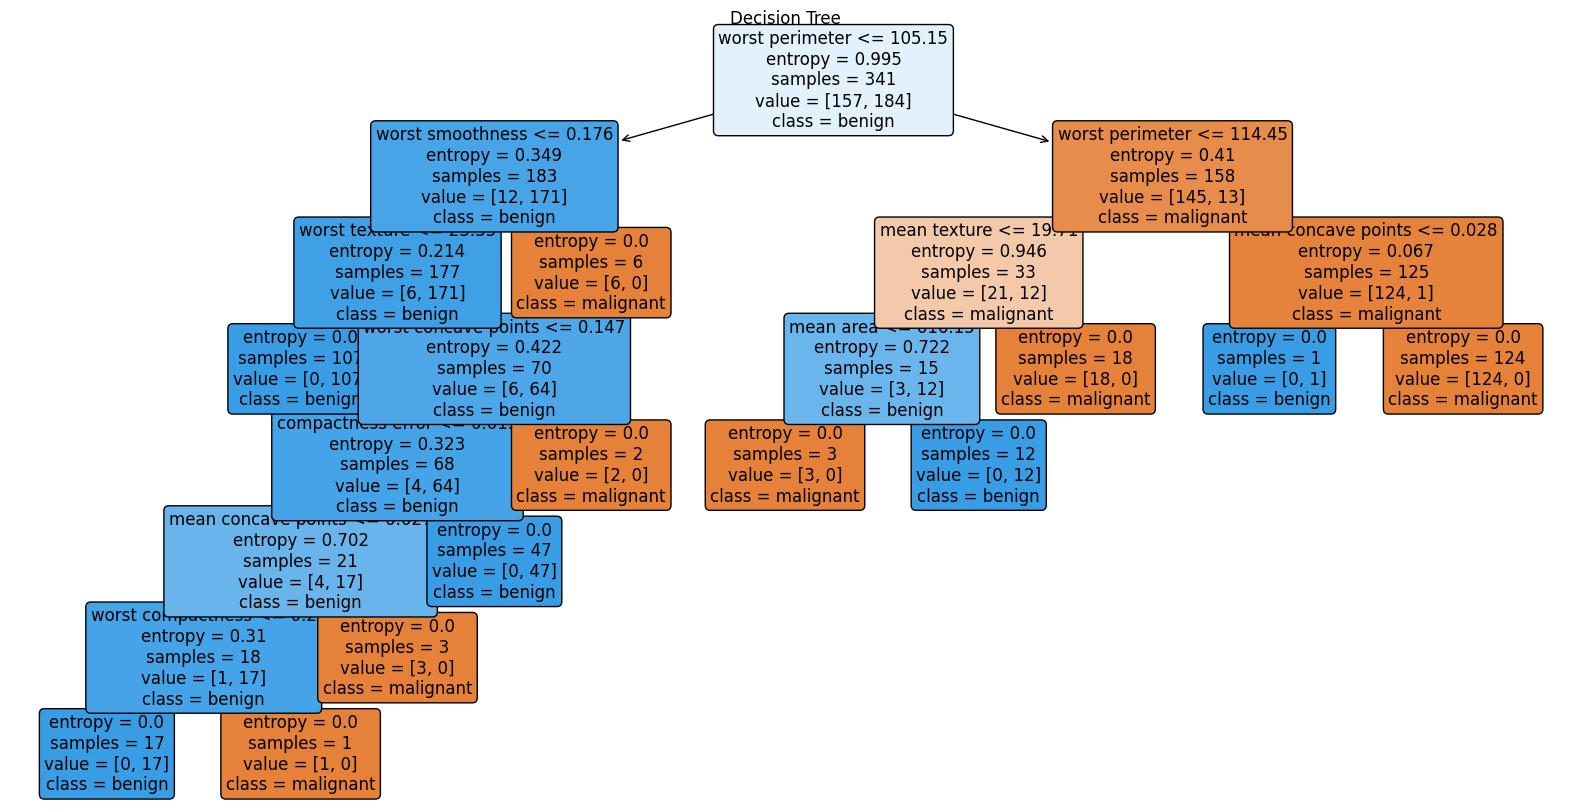

In [26]:
# Visualizzazione dell'albero creato
# dovete sostituire alla funzione plot_tree il primo parametro. Nello specifico dovete sostituirlo con il nome che avete dato al vostro DecisionTree.

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=feature_names, class_names=target_names, 
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree')
plt.show()


## **Esercizio 4: Valutiamo le performance di un DecisionTree al variare di alcuni parametri**

Come abbiamo fatto per K-NN, vogliamo valutare come variano le performance di un Decision Tree al variare di alcuni parametri. Nello specifico vogliamo valutare il modello al variare di:

* **`max_depth`**: Profondità massima dell'albero. 


In [27]:
# Funzione per plottare l' accuracy al variare della max_depth del modello

def plot_accuracy_depth(k_values, train_scores, test_scores):
    plt.figure(figsize=(12, 6))
    
    plt.plot(k_values, train_scores, 'o-', label='Accuratezza Training')
    plt.plot(k_values, test_scores, 'o-', label='Accuratezza Testing')
    
    plt.xlabel('Profondità massima dell\'albero')
    plt.ylabel('Accuratezza')
    plt.title('Decision Tree: Accuratezza vs. Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

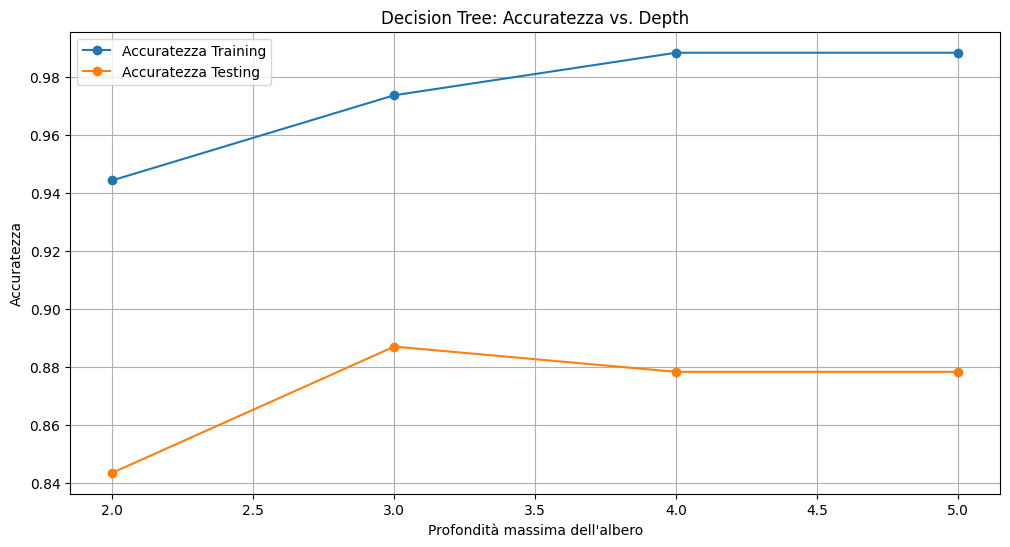

In [28]:
# Confrontiamo alberi con diverse profondità massime

max_depths = [2, 3, 4, 5]
train_accuracy = []
test_accuracy = []

# Istanziamo, alleniamo e valutiamo un DecisionTree per ogni valore di max_depth

# svoglimento...
for m in max_depths:
    dt = DecisionTreeClassifier(criterion ='entropy', max_depth = m)
    dt.fit(X_train, y_train)
    train_accuracy.append(dt.score(X_train, y_train))
    test_accuracy.append(dt.score(X_test,y_test))
    

# Visualizziamo l'effetto della profondità sull'accuratezza

# svolgimento...
plot_accuracy_depth(max_depths, train_accuracy,test_accuracy)

## **Esercizio 5: Ottimizzazione Decision Tree con GridSearch e Cross Validation**

Possiamo ottimizzare le performance di un Decision Tree specificando ulteriori parametri. Lo scopo di questo esercizio è trovare la miglior combinazione di parametri che massimizza l' accuracy del nostro modello. Per trovare questa configurazione utilizzeremo la funzione `GridSearchCV` che effettua Grid Search e Cross Validation contemporaneamente.

Innanzitutto proviamo a istanziare un Decision Tree specificando più parametri. Nello specifico impostiamo:

* `max_depth` = `3`

* `min_samples_split` = `5`

* `min_samples_leaf` = `2`

Vediamo se l' aggiunta di questi parametri incrementa le performance ottenute precedentemente.

Ovviamente i parametri impostati precedentemente devono essere mantenuti.

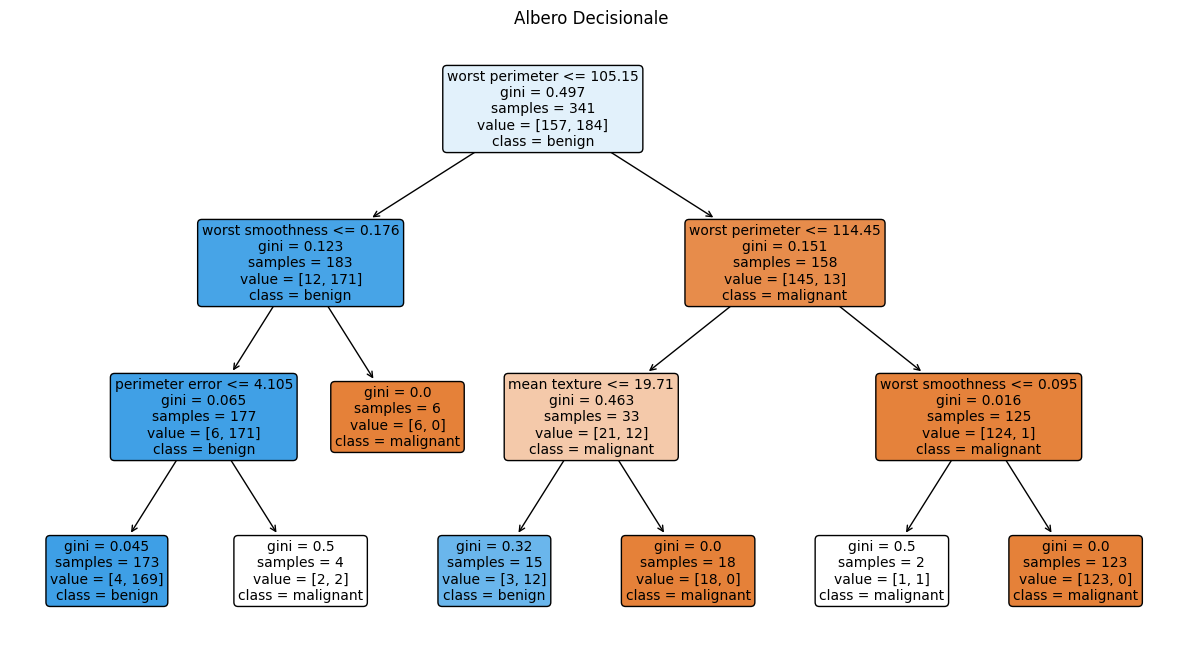

In [29]:
# Albero ottimizzato con parametri più controllati

# Istanziamo il nuovo albero specificando tutti i parametri di cui abbiamo bisogno.

# svolgimento...
dec_tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 5,min_samples_leaf = 2)

# Alleniamo l' albero

# svolgimento...
dec_tree.fit(X_train,y_train)

# Effettuare le predizioni del nuovo albero allenato

# svolgimento...
prediction = dec_tree.predict(X_test)


# Rappresentiamo il nuovo albero
# Dovete sostituire il primo parametro della funzione plot_tree con il nome del vostro albero.

plt.figure(figsize=(15, 8))
plot_tree(dec_tree, feature_names=feature_names, class_names=target_names, 
          filled=True, rounded=True, fontsize=10)
plt.title('Albero Decisionale')
plt.show()

#### **Importanza delle features**

Possiamo estrarre dal nostro modello Decision Tree l' importanza delle singole feature, cioè quanto una feature aiuda a ridurre il criterio scelto, l' entropia nel nostro caso. 

Questa informazione è contenuta in `.feature_importances_`. 

Una volta estratti questi valori, ordiniamoli in ordine decrescente e utilizziamo la funzione `plot_top_feature_importance` definita nella cella seguente per rappresentarne il grafico. La funzione richiede due parametri:

* **Vettore importanze:** il vettore contenente l' importanza delle features ottenuto dall' estrazione.

* **Nomi delle features:** i nomi delle feature che abbiamo estratto all' inizio dell' esercitazione quando abbiamo importato il dataset.

In [30]:
def plot_top_feature_importance(importances, feature_names):
    # Ordina le importanze e ottieni i primi `top_n` indici
    top_n=10
    indices = np.argsort(importances)[::-1][:top_n]

    plt.figure(figsize=(10, 6))
    plt.title('Importanza delle Feature')
    
    # Plotta solo le prime `top_n` barre
    plt.bar(range(top_n), importances[indices], align='center', color='skyblue')
    
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importanza')
    plt.tight_layout()  # Aggiunge spazio tra i lati del grafico
    plt.show()

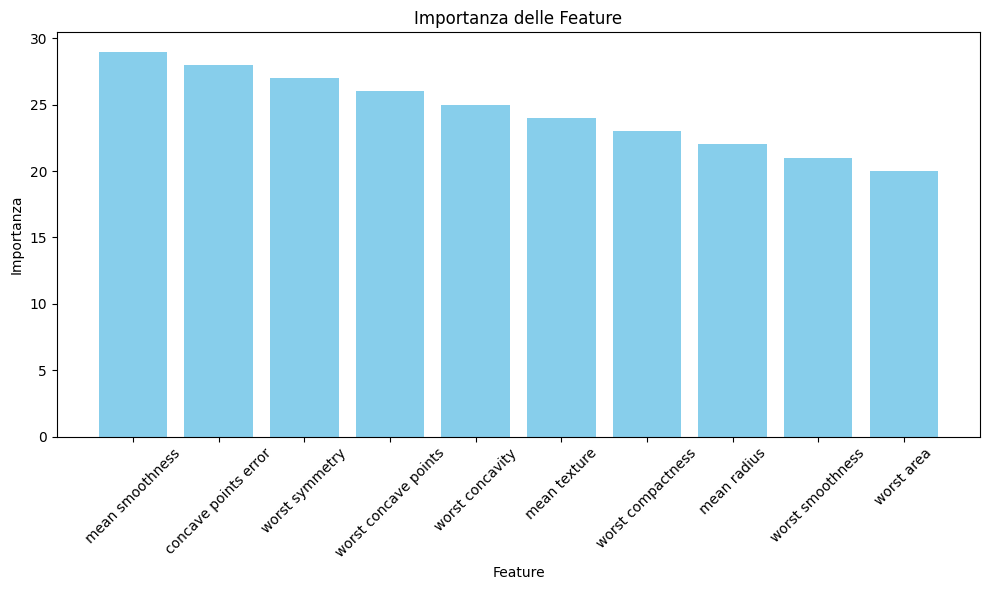

In [31]:
# Estrai l' importanza delle features da .feature_importances_

# svolgimento...
importanza = dec_tree.feature_importances_

# Riordina in ordine decrescente

# svolgimento...
importanza_ordinata = np.argsort(importanza)[::-1]

# Rappresentiamo il grafico

# svolgimento...
plot_top_feature_importance(importanza_ordinata, feature_names)

### **Grid search**

Poichè i parametri impostabili in un modello sono numerosi testare le singole configurazioni è dispendioso. Tuttavia la ricerca dei parametri ottimali è l' unico modo che abbiamo per assicurarci di estrarre la miglior performance dal nostro modello. In questi casi ci sono diverse strateggie per cercare la configurazione migliore. Una di questa è la **Grid search** (letteralmente **ricerca a griglia**) che consiste nel testare tutte le possibili configurazioni e selezionare la migliore. Chiaramente testare tutte le configurazioni rende il grid search un algoritmo molto dispendioso dal punto di vista computazionale.

Possiamo implementare un algoritmo di grid search utilizzando la classe `GridSearchCV` di `sklearn` che effettua contemporaneamente ricerca a griglia e cross-validation. 

#### Guida per Grid Search:

I seguenti passaggi devono guidarvi all' utilizzo di `GridSearchCV` per trovare la miglior configurazione per un modello di DecisionTree per il nostro dataset.

1. **Istanziamo un' oggetto `GridSearchCV`:** per creare l' oggetto `GridSearchCV` dobbiamo specificare i seguenti parametri

    * Modello che vogliamo usare

    * Dizionario contenente come chiavi i parametri che vogliamo testare, e come value i valori che vogliamo impiegare

    * `cv` cioè il nomero di fold che vogliamo utilizzare per la cross-validaton

    * `scoring` ovvero la metrica da utilizzare per valutare, ad esempio `accuracy`

2. **Eseguire Grid Search:** utilizziamo il metodo `.fit()` dell' oggetto `GridSearchCV` definito al punto 1 per eseguire l' algoritmo

3. **Stampare configurazione migliore:** dopo aver eseguito il `.fit()`, l' oggetto `GridSearchCV` ci permette di accedere ad alcuni attributi:

    * `.best_params_`: un dizionario che rappresenta la miglior configurazione.

    * `.best_scores_`: il valore migliore ottenuto come accuracy.

    * `.best_estimator_`: il modello allenato con la configurazione migliore. 

In [32]:
# Step 1 - Istanziare l' oggetto GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definizione del grid di parametri
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy']
}

# svolgimento...
dt_model = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [33]:
# Step 2 - Eseguire Grid Search

# svolgimento...
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [34]:
# Step 3 - Stampare i risultati
# Stampare la migliore configurazione e la migliore accuracy

# svolgimento...
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
0.9618073316283036


# **Esercizio 6: Model Selection classificatori**

Avendo affrontato tutti i classificatori visti in questo corso, possiamo adesso procedere alla fase di **model selection**. Vogliamo trovare quale classificatore la relativa configurazione che meglio performano su uno specifico dataset. 

### **Dataset**

Per questo esercizio utilizzeremo il dataset `Vehicle Silhouette` che trovato al seguente [link](https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes). Il dataset contiene 846 campioni su 18 features, e contiene informazioni circa le dimensioni di alcuni veicoli. L' obiettivo è classificare ogni campione in 4 possibili classi. 

In [3]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X = statlog_vehicle_silhouettes.data.features 
y = statlog_vehicle_silhouettes.data.targets 

y_flat = np.ravel(y)

y_series = pd.Series(y_flat)

print("Distribuzione delle classi (prima):")
print(y_series.value_counts())

classi_da_mantenere = y_series.value_counts()[y_series.value_counts() > 1].index
print("\nClassi da mantenere (con >1 campione):", list(classi_da_mantenere))

mask = y_series.isin(classi_da_mantenere)

X = X[mask]
y = y_series[mask]

print("\nDistribuzione delle classi dopo il filtraggio:")
print(y.value_counts())

Distribuzione delle classi (prima):
saab    217
bus     217
opel    212
van     199
204       1
Name: count, dtype: int64

Classi da mantenere (con >1 campione): ['saab', 'bus', 'opel', 'van']

Distribuzione delle classi dopo il filtraggio:
saab    217
bus     217
opel    212
van     199
Name: count, dtype: int64


In [11]:
# svolgimento...

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


train_fraction = 0.8
test_fraction = 0.2

num_train = int(X.shape[0] * train_fraction)
X_train = X[: num_train]
y_train = y[: num_train]
X_test = X[num_train :]
y_test = y[num_train :]
print(X_train.shape)
print(X_test.shape)

(676, 18)
(169, 18)


In [13]:
modelli = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(criterion ='entropy', random_state=42))
]

param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'max_iter': [100, 1000],
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel' : ['linear', 'rbf'],
        'gamma' : ['scale', 'auto'],
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights' : ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine'], 
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
}


I migliori parametri per Logistic Regression sono: {'C': 10, 'max_iter': 100}
I migliori parametri per SVM sono: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
I migliori parametri per KNN sono: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
I migliori parametri per Decision Tree sono: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy di Logistic Regression: 0.8106508875739645

Report di classificazione di Logistic Regression:
              precision    recall  f1-score   support

         bus       0.95      0.93      0.94        44
        opel       0.65      0.59      0.62        37
        saab       0.71      0.75      0.73        48
         van       0.93      0.95      0.94        40

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169



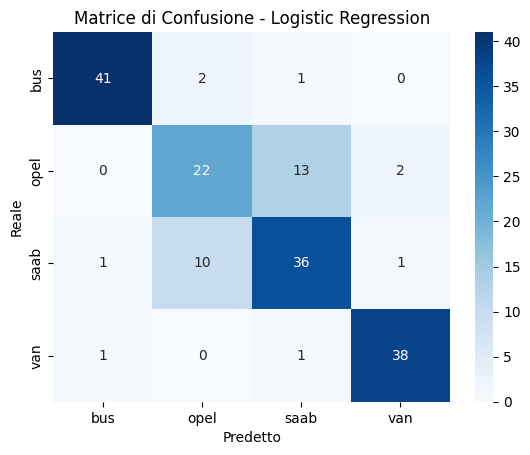

Accuracy di SVM: 0.863905325443787

Report di classificazione di SVM:
              precision    recall  f1-score   support

         bus       0.98      0.95      0.97        44
        opel       0.72      0.76      0.74        37
        saab       0.80      0.77      0.79        48
         van       0.95      0.97      0.96        40

    accuracy                           0.86       169
   macro avg       0.86      0.86      0.86       169
weighted avg       0.87      0.86      0.86       169



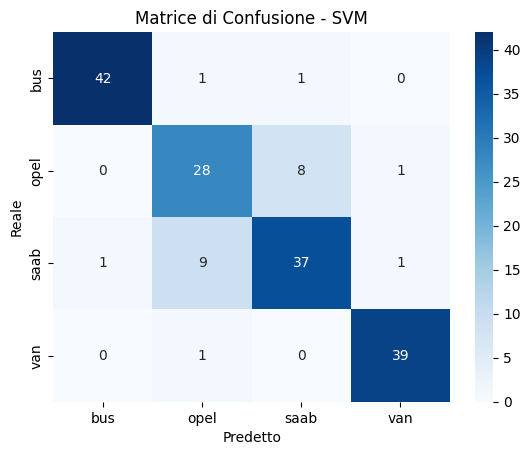

Accuracy di KNN: 0.7455621301775148

Report di classificazione di KNN:
              precision    recall  f1-score   support

         bus       0.95      0.91      0.93        44
        opel       0.50      0.59      0.54        37
        saab       0.65      0.50      0.56        48
         van       0.87      1.00      0.93        40

    accuracy                           0.75       169
   macro avg       0.74      0.75      0.74       169
weighted avg       0.75      0.75      0.74       169



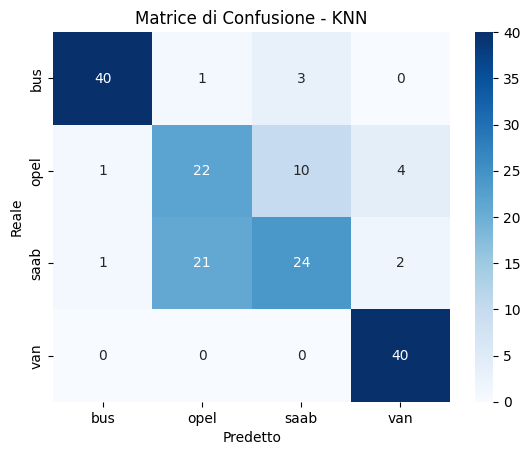

Accuracy di Decision Tree: 0.727810650887574

Report di classificazione di Decision Tree:
              precision    recall  f1-score   support

         bus       0.98      0.95      0.97        44
        opel       0.46      0.59      0.52        37
        saab       0.58      0.46      0.51        48
         van       0.93      0.93      0.93        40

    accuracy                           0.73       169
   macro avg       0.73      0.73      0.73       169
weighted avg       0.74      0.73      0.73       169



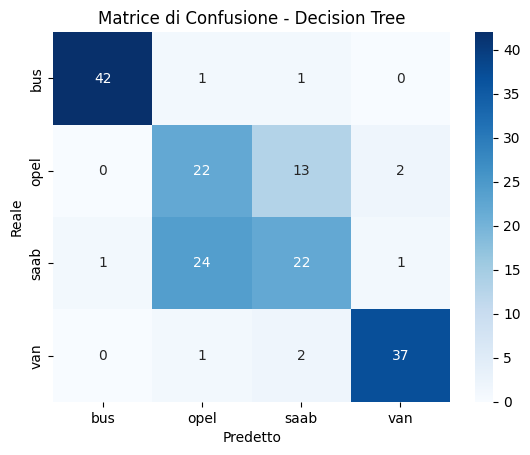

In [14]:
grid_searches = []
for nome, modello in modelli:
    grid_search = GridSearchCV(modello, param_grid[nome], cv=5,scoring = 'accuracy', n_jobs = -1)
    grid_searches.append((nome, grid_search))

best_models = {}
for nome, grid_search in grid_searches:
    grid_search.fit(X_train, y_train)
    best_models[nome] = grid_search.best_estimator_
    print(f"I migliori parametri per {nome} sono: {grid_search.best_params_}")

for nome, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy di {nome}: {accuracy}")
    print(f"\nReport di classificazione di {nome}:" )
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.title(f'Matrice di Confusione - {nome}')
    plt.xlabel('Predetto')
    plt.ylabel('Reale')
    plt.show()